In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_smart_tv = pd.read_csv('dataset_smart-tv.csv', usecols = ['date_hour','bytes_up', 'bytes_down'])
df_chromecast = pd.read_csv('dataset_chromecast.csv', usecols = ['date_hour','bytes_up', 'bytes_down'])

df_smart_tv[['bytes_up', 'bytes_down']] += 1
df_chromecast[['bytes_up', 'bytes_down']] += 1

df_smart_tv = pd.concat([df_smart_tv["date_hour"], np.log10(df_smart_tv[['bytes_up', 'bytes_down']])], axis=1)
df_chromecast = pd.concat([df_chromecast["date_hour"], np.log10(df_chromecast[['bytes_up', 'bytes_down']])], axis=1)

values = df_smart_tv["date_hour"]
converted_values = []
for x in values:
    try:
        converted_values += [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour]
    except:
        converted_values += [x]

df_smart_tv["date_hour"] = converted_values

values = df_chromecast["date_hour"]
converted_values = []
for x in values:
    try:
        converted_values += [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour]
    except:
        converted_values += [x]

df_chromecast["date_hour"] = converted_values

df_smart_tv, df_chromecast

(         date_hour  bytes_up  bytes_down
 0               15  5.123636    6.449963
 1               15  5.063602    6.354955
 2               15  5.057023    6.363475
 3               15  4.987539    6.302449
 4               15  4.597372    5.906413
 ...            ...       ...         ...
 4417898         23  0.954243    0.954243
 4417899         23  0.954243    0.954243
 4417900         23  0.954243    0.954243
 4417901         23  0.954243    0.954243
 4417902         23  0.954243    1.518514
 
 [4417903 rows x 3 columns],
          date_hour  bytes_up  bytes_down
 0                0  3.475383    4.691848
 1                0  2.836916    2.517536
 2                0  3.652720    4.578812
 3                0  2.890496    2.362105
 4                0  3.488877    4.713136
 ...            ...       ...         ...
 1620524         16  3.306425    4.637820
 1620525         16  3.850585    3.202216
 1620526         16  2.689309    4.695771
 1620527         16  0.000000    2.136721
 16

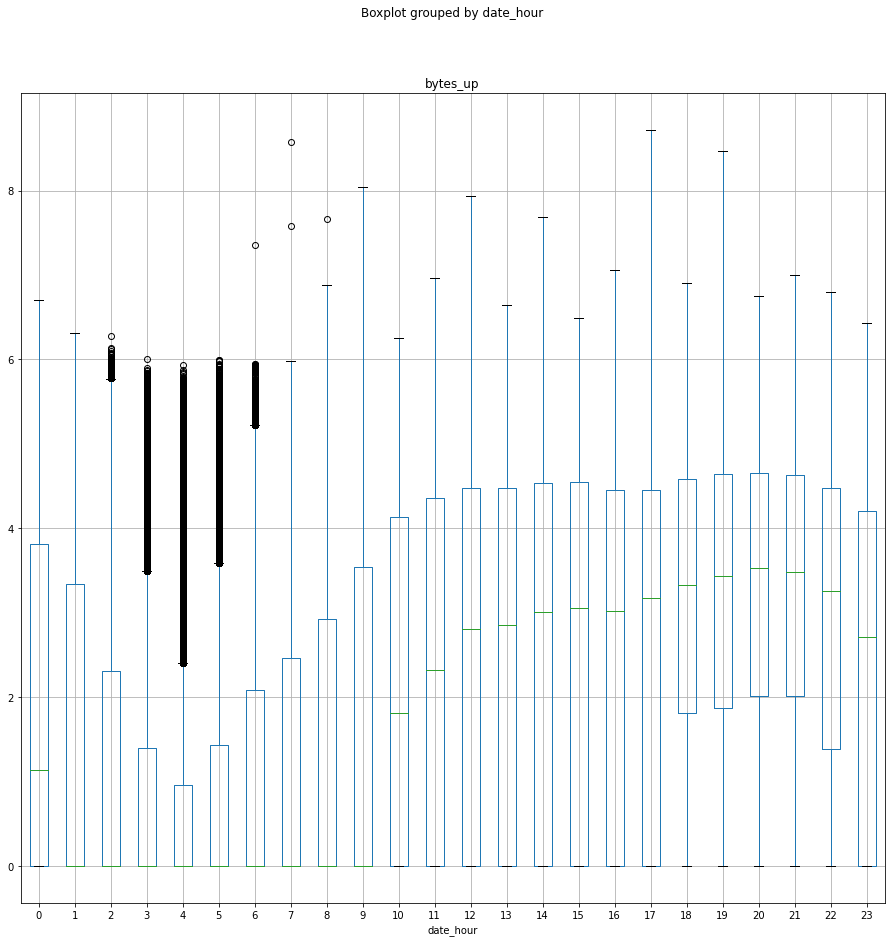

In [13]:
df_smart_tv.boxplot(column="bytes_up", by="date_hour", figsize=(15, 15))

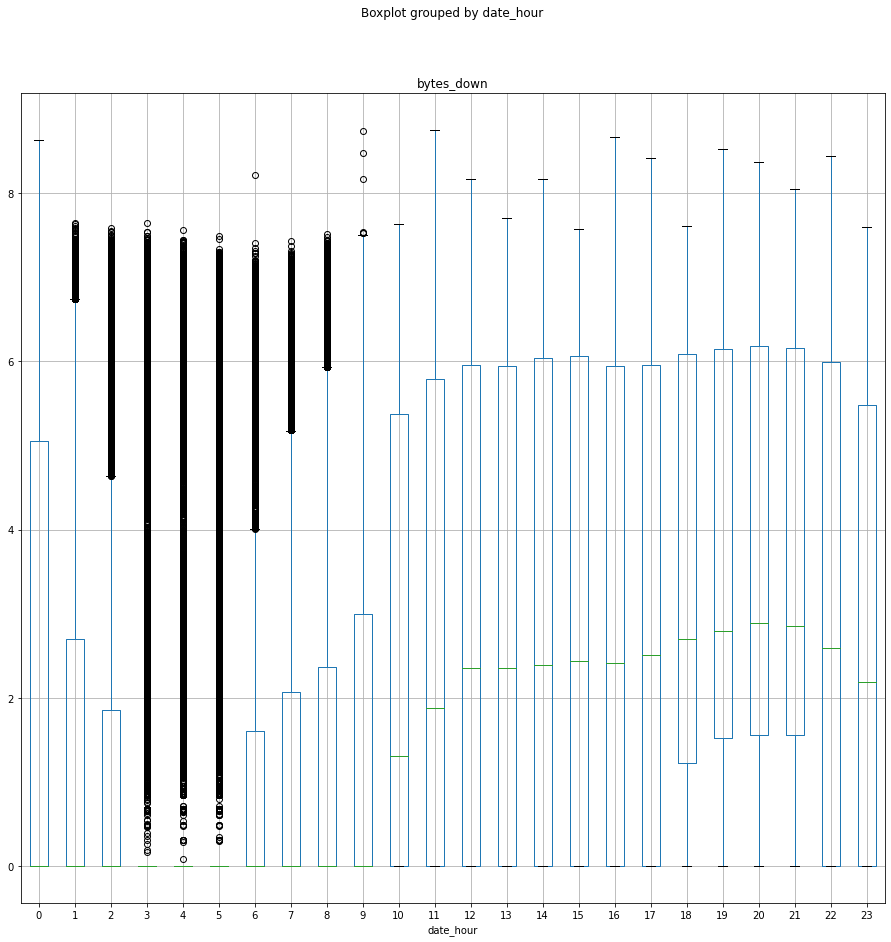

In [14]:
df_smart_tv.boxplot(column="bytes_down", by="date_hour", figsize=(15, 15))

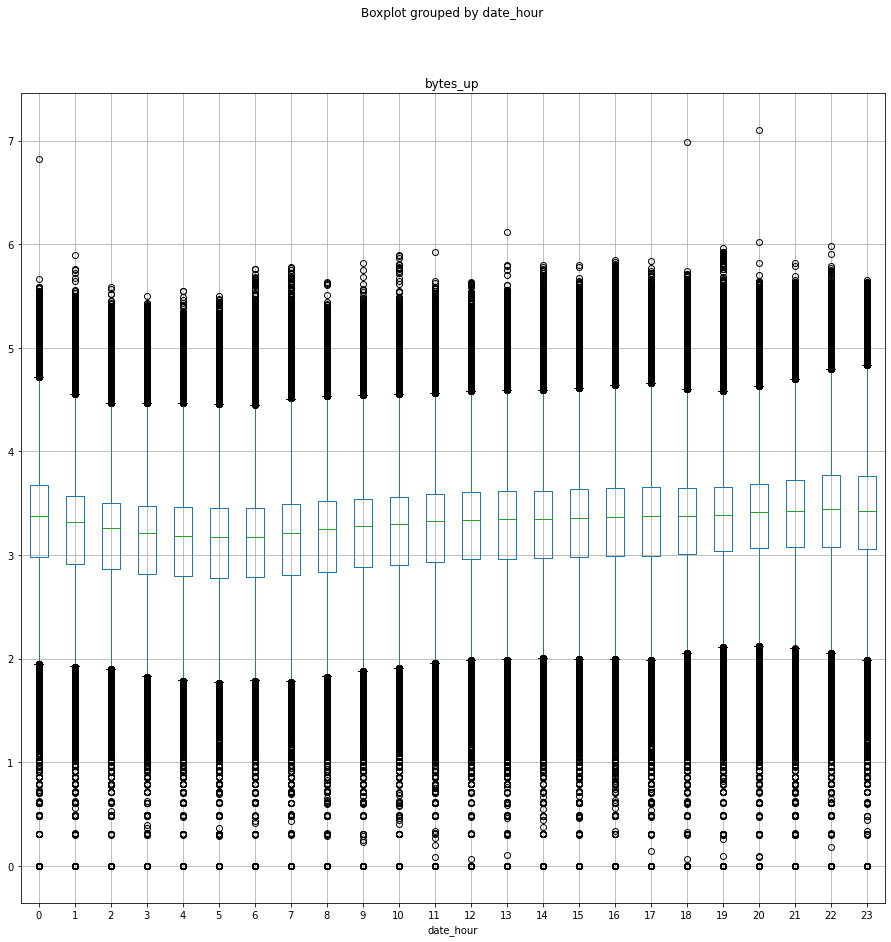

In [16]:
df_chromecast.boxplot(column="bytes_up", by="date_hour", figsize=(15, 15))

<AxesSubplot:title={'center':'bytes_down'}, xlabel='date_hour'>

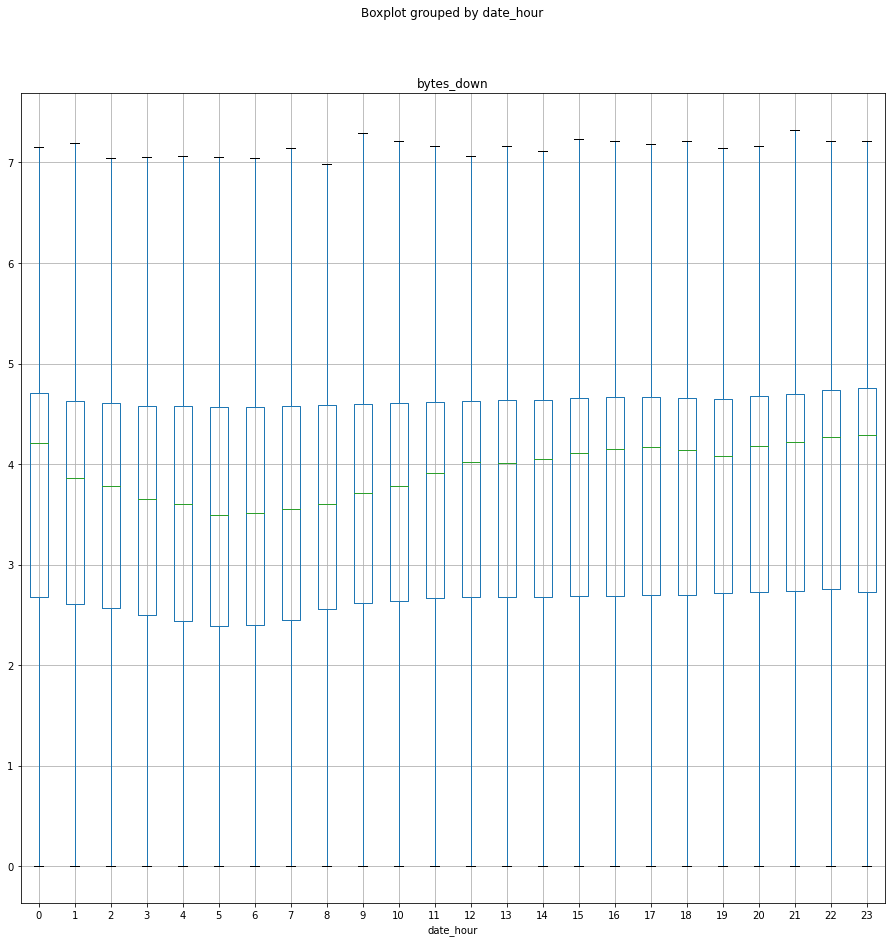

In [6]:
display(df_chromecast.boxplot(column="bytes_down", by="date_hour", figsize=(15, 15)))

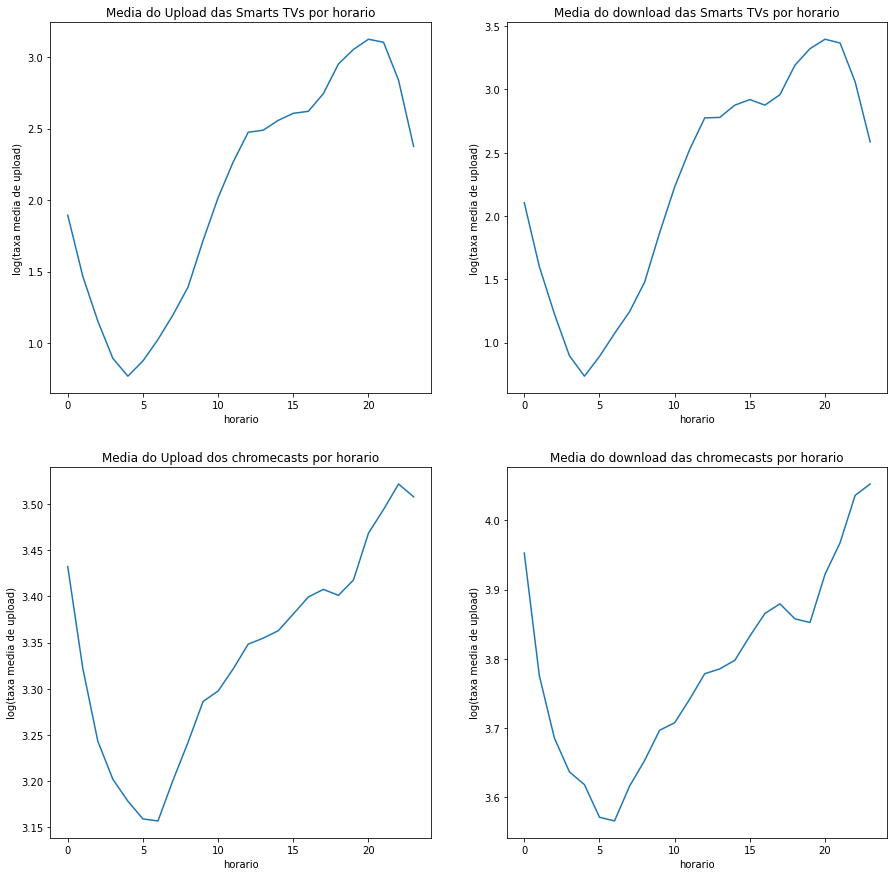

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].plot(df_smart_tv.groupby("date_hour")["bytes_up"].mean())
ax[0][0].set_title("Media do Upload das Smarts TVs por horario")
ax[0][0].set_xlabel("horario")
ax[0][0].set_ylabel("log(taxa media de upload)")

ax[0][1].plot(df_smart_tv.groupby("date_hour")["bytes_down"].mean())
ax[0][1].set_title("Media do download das Smarts TVs por horario")
ax[0][1].set_xlabel("horario")
ax[0][1].set_ylabel("log(taxa media de upload)")

ax[1][0].plot(df_chromecast.groupby("date_hour")["bytes_up"].mean())
ax[1][0].set_title("Media do Upload dos chromecasts por horario")
ax[1][0].set_xlabel("horario")
ax[1][0].set_ylabel("log(taxa media de upload)")

ax[1][1].plot(df_chromecast.groupby("date_hour")["bytes_down"].mean())
ax[1][1].set_title("Media do download das chromecasts por horario")
ax[1][1].set_xlabel("horario")
ax[1][1].set_ylabel("log(taxa media de upload)")

plt.show()

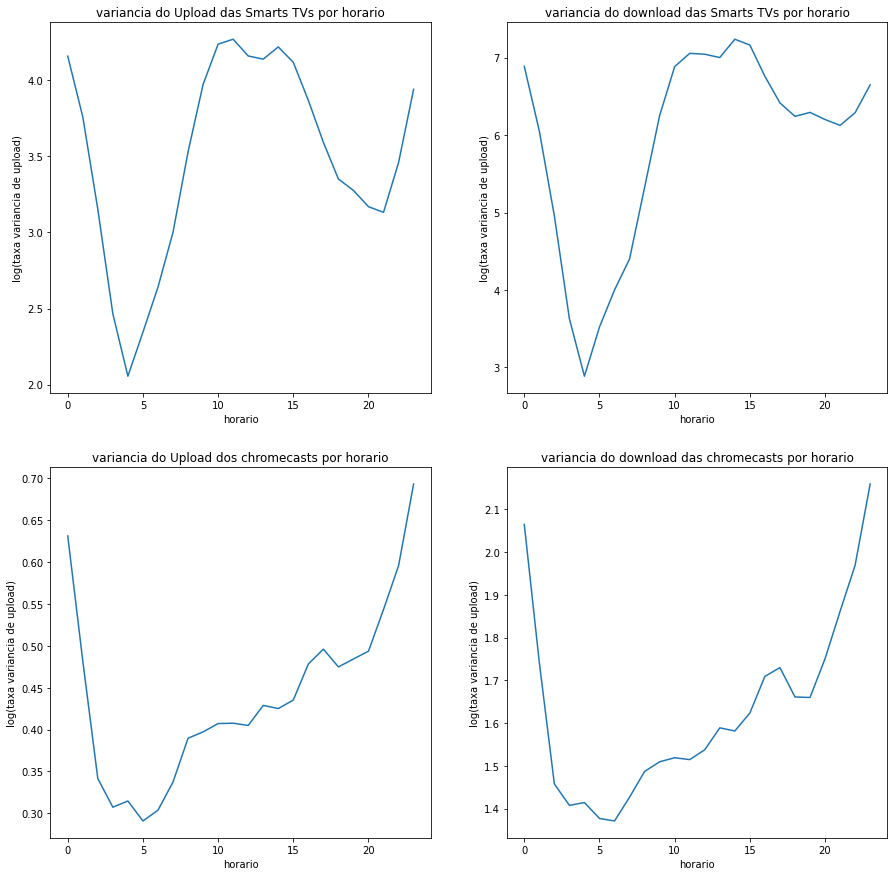

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].plot(df_smart_tv.groupby("date_hour")["bytes_up"].var())
ax[0][0].set_title("variancia do Upload das Smarts TVs por horario")
ax[0][0].set_xlabel("horario")
ax[0][0].set_ylabel("log(taxa variancia de upload)")

ax[0][1].plot(df_smart_tv.groupby("date_hour")["bytes_down"].var())
ax[0][1].set_title("variancia do download das Smarts TVs por horario")
ax[0][1].set_xlabel("horario")
ax[0][1].set_ylabel("log(taxa variancia de upload)")

ax[1][0].plot(df_chromecast.groupby("date_hour")["bytes_up"].var())
ax[1][0].set_title("variancia do Upload dos chromecasts por horario")
ax[1][0].set_xlabel("horario")
ax[1][0].set_ylabel("log(taxa variancia de upload)")

ax[1][1].plot(df_chromecast.groupby("date_hour")["bytes_down"].var())
ax[1][1].set_title("variancia do download das chromecasts por horario")
ax[1][1].set_xlabel("horario")
ax[1][1].set_ylabel("log(taxa variancia de upload)")

plt.show()

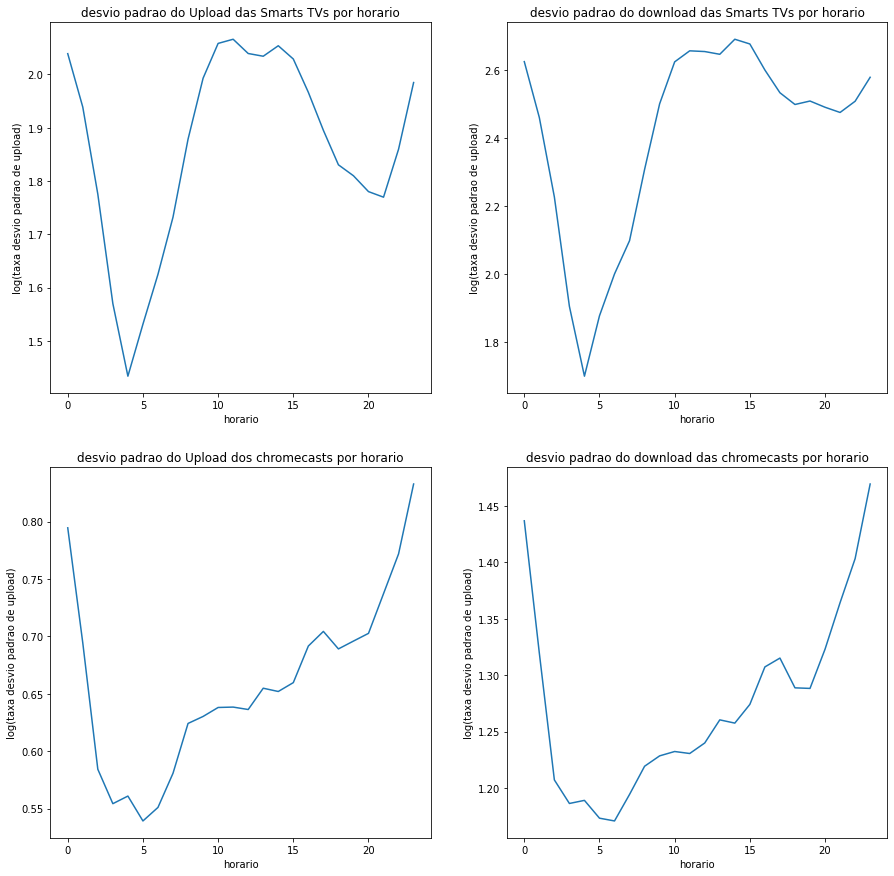

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].plot(df_smart_tv.groupby("date_hour")["bytes_up"].std())
ax[0][0].set_title("desvio padrao do Upload das Smarts TVs por horario")
ax[0][0].set_xlabel("horario")
ax[0][0].set_ylabel("log(taxa desvio padrao de upload)")

ax[0][1].plot(df_smart_tv.groupby("date_hour")["bytes_down"].std())
ax[0][1].set_title("desvio padrao do download das Smarts TVs por horario")
ax[0][1].set_xlabel("horario")
ax[0][1].set_ylabel("log(taxa desvio padrao de upload)")

ax[1][0].plot(df_chromecast.groupby("date_hour")["bytes_up"].std())
ax[1][0].set_title("desvio padrao do Upload dos chromecasts por horario")
ax[1][0].set_xlabel("horario")
ax[1][0].set_ylabel("log(taxa desvio padrao de upload)")

ax[1][1].plot(df_chromecast.groupby("date_hour")["bytes_down"].std())
ax[1][1].set_title("desvio padrao do download das chromecasts por horario")
ax[1][1].set_xlabel("horario")
ax[1][1].set_ylabel("log(taxa desvio padrao de upload)")

plt.show()